<h1><b>CSC10108 - TRỰC QUAN HÓA DỮ LIỆU</b></h1>
<h1><b>LAB-01: TRỰC QUAN HÓA DỮ LIỆU VỚI PYTHON</b></h1>

<b>Thông tin nhóm:

<b>PHAN XUÂN HOÀI – 20120481

<b>PHAN PHONG LƯU - 20120326

<b>LÂM NHỰT TRƯỜNG – 20120611

<b>TRẦN MINH QUANG – 20120559

<h2><b>Mô tả đồ án</b></h2>

Trong bài tập thực hành này, sinh viên tìm hiểu mối quan hệ giữa các trường dữ liệu thực tế thông qua việc trực quan hóa dữ liệu. Sinh viên thực hiện tìm kiếm dữ liệu đã được công khai trên trang Kaggle datasets: https://www.kaggle.com/datasets về một chủ đề mà nhóm sinh viên quan tâm, hứng thú. Dữ liệu phải được cấu trúc hóa thành một bảng gồm ít nhất 5 trường dữ liệu và 1000 dòng.  

Tập dữ liệu của đồ án lần này được lấy trên <b>Kaggle</b> gồm có 1 file là <b>ShoePrices.csv</b>, bao gồm thông tin của tất cả các hãng sản xuất giày và loại giày của hãng đó cũng như các thông số liên quan tới giày, được thu thập để so sánh chi tiết giữa các loại giày cũng như giữa các thương hiệu.

<h2><b>Thu thập dữ liệu</b></h2>

***Ngữ cảnh, câu chuyện gì khiến nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?***

Các thành viên nhóm em đều có niềm đam mê về thể thao và qua đó cũng có niềm đam mê về giày và chúng em muốn biết thêm về thông tin các loại giày, vì vậy chúng em quyết định chọn bộ dữ liệu này để có một cái nhìn trực quan hơn về giá của các loại sản phẩm này.

***Dữ liệu mà nhóm sinh viên là về chủ đề gì và được lấy từ nguồn nào?***

Dữ liệu mà chúng em chọn là về giá của các loại giày như Nike, Adidas, Asics vân vân , được lấy từ Kaggle https://www.kaggle.com/datasets/rkiattisak/shoe-prices-dataset

***Người ta có cho phép sử dụng dữ liệu như thế này hay không? Ví dụ: cần kiểm
tra thử License của dữ liệu là gì?***

Chúng em được phép sử dụng dữ liệu này cho mục đích học tập, kể cả xây dựng hoặc biến đổi lại cho mục đích thương mại.
License của dữ liệu là: https://creativecommons.org/licenses/by/4.0/

***Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?***

Tác giả không đề cập đến nguồn gốc cũng như phương pháp thu thập dữ liệu, nhưng có thể dự đoán là dữ liệu được thu thập từ các website của hãng hoặc các trang thương mại điện tử

<b><h2>Khám phá dữ liệu</b></h2>

<b>import các thư viện</b>


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_theme()

In [46]:
df = pd.read_csv('Shoe prices.csv')
display(df.head())
print(df.shape)

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


(1006, 8)


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
- Mỗi dòng cho biết thương hiệu, kiểu giày, loại giày, giới tính, kích cỡ, màu sắc, chất liệu, giá bán của các mẫu giày được thu thập.
- Không có vấn đề các dòng có ý nghĩa khác nhau.

<b>Loại bỏ các dòng trùng nhau<b>

In [47]:
df = df.drop_duplicates(ignore_index=True)

### Mỗi cột có ý nghĩa gì?
Ý nghĩa của các cột trong dữ liệu:
- **Brand**: Thương hiệu giày
- **Model**: Kiểu giày
- **Type**: Loại giày
- **Gender**: Cho biết loại giày nam hay nữ
- **Size**: Kích cỡ giày
- **Color**: Màu sắc chính
- **Material**: Chất liệu chính của giày
- **Price (USD)**: Giá bán, tính theo USD

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?
Kiểu dữ liệu của mỗi cột:

In [48]:
df.dtypes

Brand          object
Model          object
Type           object
Gender         object
Size           object
Color          object
Material       object
Price (USD)    object
dtype: object

- Cột **Size** và **Price (USD)** nên có kiểu dữ liệu là số thực 
- Các cột còn lại có kiểu dữ liệu hợp lý

Trước tiên cần kiểm tra tất cả dữ liệu trong cột **Size** đều là *'US'* hay không.

In [49]:
assert (df['Size'].str.contains('US')).all()

In [50]:
# Hàm trả về số thực đầu tiên của chuỗi, nếu không có thì trả về NaN
def getFirstFloat(arg: str):
    match = re.search(r'[+-]?\d*\.?\d+', arg)
    if match:
        return float(match.group())
    return float('NaN')


- Chuyển dữ liệu cột **Size** và **Price (USD)** sang số thực bằng cách lấy số thực đầu tiên xuất hiện trong chuỗi</br>
- Đổi tên cột **Size** thành **Size (US)**

In [51]:
df['Size'] = df['Size'].apply(getFirstFloat).astype('float')
df['Price (USD)'] = df['Price (USD)'].apply(getFirstFloat).astype('float')
df.rename(columns = {'Size':'Size (US)'}, inplace = True)

In [52]:
df.dtypes

Brand           object
Model           object
Type            object
Gender          object
Size (US)      float64
Color           object
Material        object
Price (USD)    float64
dtype: object

### Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?
- Size (US)





In [53]:
size = df['Size (US)']
print('min = ',size.min(), '\nmax = ', size.max(), '\nmedian = ', size.median())

min =  6.0 
max =  12.0 
median =  9.0


- Price(USD)

In [54]:
price = df['Price (USD)']
print('min = ',price.min(), '\nmax = ', price.max(), '\nmedian = ', price.median())

min =  25.0 
max =  250.0 
median =  90.0


<h2><b>Khám phá mối quan hệ trong dữ liệu</b></h2>


### 1. Trực quan phân phối của giá giày

**Lựa chọn loại biểu đồ:** Đối với trực quan về phân phối của một biến hay hai biến ta có thể sử dụng biểu đồ histogram. Biểu đồ histogram phù hợp để biểu diễn phân bố của giá giày là vì nó có thể tính toán được được tần suất, số lần xuất hiện của các khoảng giá giày và trực quan nó.

**Trực quan:**

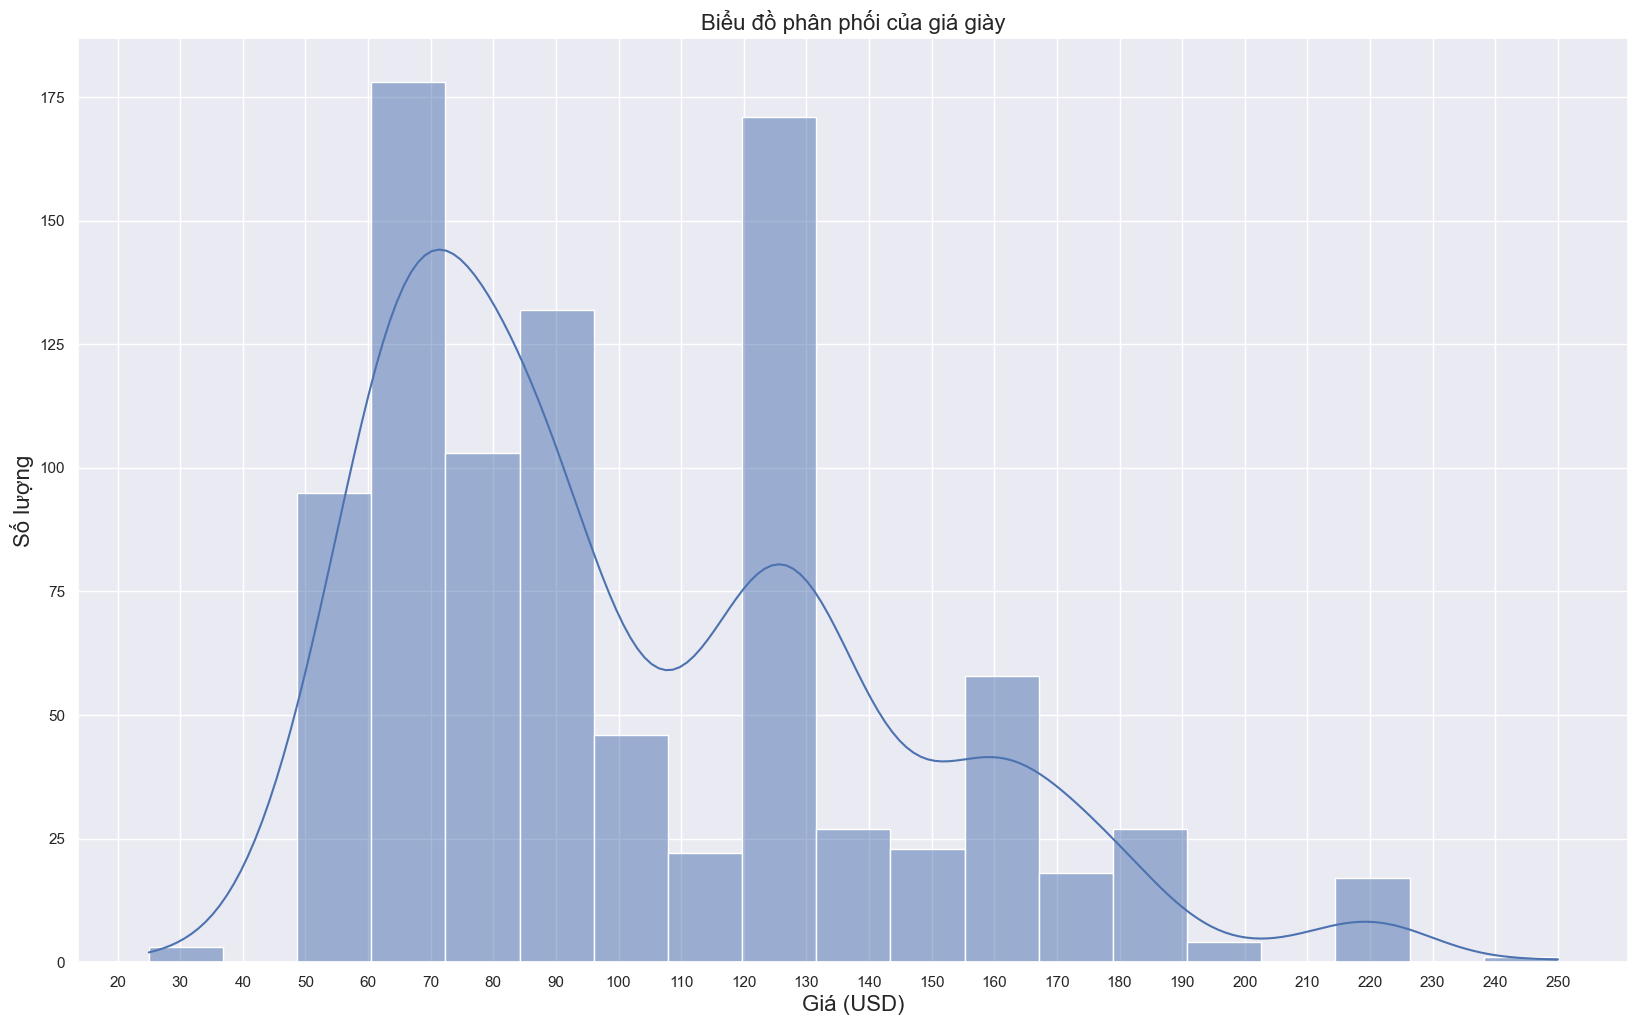

In [18]:
plt.figure(figsize=(20,12))
sns.histplot(x = df['Price (USD)'], kde=True)
plt.title('Biểu đồ phân phối của giá giày',fontsize=16)
plt.xlabel('Giá (USD)',fontsize=16)
plt.ylabel('Số lượng',fontsize=16)
plt.xticks(np.arange(20, df['Price (USD)'].max()+ 5, 10))
# plt.grid(False)
plt.show()

**Nhận xét:** 
- Các sản phẩm giày được bán phần lớn nằm trong phân khúc từ 50 - 100 USD
- Riêng cá biệt các sản phẩm giày có giá từ 120 - 130 USD không nằm trong khoảng trên nhưng có số lượng bày bán cao thứ 2

### 2. Tỉ lệ các nhãn hiệu giày có trong dữ liệu

**Lựa chọn loại biểu đồ:** Đối với trực quan về tỉ lệ của biến dạng catogories ta có thể sử dụng biểu đồ tròn để so sánh tỉ lệ giữa các đối tượng trong tổng thể 100%.

**Bước 1:** Tính số lượng giày cho mỗi thương hiệu

In [19]:
# Tính số lượng giày của mỗi Brand
temp_serie = df['Brand'].value_counts()
temp_serie

New Balance    98
Fila           97
Nike           95
Asics          95
Adidas         94
Reebok         94
Puma           94
Vans           87
Skechers       87
Converse       84
Name: Brand, dtype: int64

**Bước 2:** Trực quan

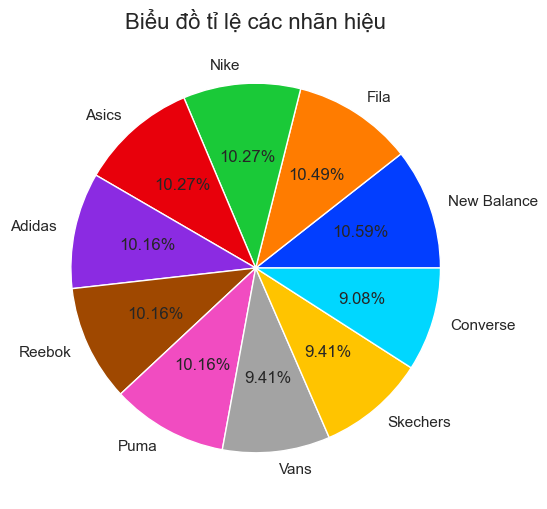

In [20]:
plt.figure(figsize=(20,6))
colors = sns.color_palette('bright')[0:len(temp_serie)+1]

#create pie chart
plt.pie(temp_serie.values, labels = temp_serie.index, colors = colors, autopct='%.2f%%')
plt.title('Biểu đồ tỉ lệ các nhãn hiệu',fontsize=16)
plt.show()


**Nhận xét:** Tỉ lệ giày của các thương hiệu có trong dataset không có sự chênh lệch nhiều. Với 10 thương hiệu, mỗi thương hiệu chiếm từ khoảng 9,08% đến 10,59% mẫu giày có trong tập dữ liệu.

### 3. Giới tính có ảnh hưởng thế nào đến màu sắc của giày?

**Lựa chọn biểu đồ:** 
- Sử dụng hai biểu đồ dạng cột với mỗi biểu đồ biểu diễn số lượng giày theo màu sắc cho nam và nữ.
- Với biểu đồ cột ta có thể thấy được xu thế màu sắc giày của mỗi giới tính và với hai biểu đồ cạnh nhau ta có thể dễ dàng so sánh.

**Bước 1:** Tách các dòng có giày nhiều màu sắc thành các dòng mới với một màu

In [21]:
# Tách các dòng có giày nhiều màu sắc thành các dòng mới với một màu
temp_df = df[['Gender','Color']].copy()
temp_df['Color'] = temp_df['Color'].str.split('/')

temp_df = temp_df.explode('Color') 
temp_df

,Gender,Color
0,Men,Red
0,Men,Black
1,Men,Black
2,Men,White
3,Women,Navy
...,...,...
920,Women,Grey
921,Men,Black
922,Women,White
923,Men,Grey


**Bước 2:** Tính số lượng giày mỗi màu sắc cho từng giới tính

**2.1** Nam

In [22]:
# Lấy ra các dòng có giới Nam và tính số lượng
mask = temp_df['Gender'] == 'Men'
men_color = temp_df.loc[mask].groupby('Color').value_counts()
men_color = men_color.sort_values(ascending=False)
men_color

Color               Gender
Black               Men       215
White               Men       174
Grey                Men        77
Blue                Men        51
Red                 Men        47
Navy                Men        33
Green               Men        21
Yellow              Men        14
Orange              Men        11
Cream White         Men         3
Gold                Men         3
Beige               Men         2
Cream               Men         2
Gum                 Men         1
Khaki               Men         1
Natural             Men         1
Collegiate Navy     Men         1
Checkerboard Black  Men         1
Silver              Men         1
Charcoal            Men         1
Burgundy            Men         1
Zebra               Men         1
dtype: int64

In [23]:
# Gom các màu sắc có số lượng ít thành Other
men_color = men_color.droplevel('Gender').reset_index()
mask = men_color[0] < 10
men_color.loc[mask, 'Color'] = "Other"
men_color = men_color.groupby('Color').sum().sort_values(by=0, ascending=False)
men_color

,0
Color,
Black,215
White,174
Grey,77
Blue,51
Red,47
Navy,33
Green,21
Other,19
Yellow,14


---

**2.2** Nữ

In [24]:
mask = temp_df['Gender'] == 'Women'
women_color = temp_df.loc[mask].groupby('Color').value_counts()
women_color = women_color.sort_values(ascending=False)
women_color

Color               Gender
White               Women     134
Black               Women     133
Pink                Women     105
Grey                Women      65
Blue                Women      26
Green               Women      16
Purple              Women      16
Navy                Women      15
Red                 Women      12
Cream               Women       8
Yellow              Women       6
Checkered           Women       3
Egret               Women       3
Silver              Women       3
Cream White         Women       3
Cloud White         Women       2
Checkerboard        Women       2
Orange              Women       2
Ivory               Women       2
Gold                Women       2
Beige               Women       2
Multi-color         Women       1
Natural Ivory       Women       1
Cinder              Women       1
Checkerboard Black  Women       1
Clay Brown          Women       1
Burgundy            Women       1
Sunflower           Women       1
True White          W

In [25]:
# Gom các màu sắc có số lượng ít thành Other
women_color = women_color.droplevel('Gender').reset_index()
mask = women_color[0] < 10
women_color.loc[mask, 'Color'] = "Other"
women_color = women_color.groupby('Color').sum().sort_values(by=0, ascending=False)
women_color

,0
Color,
White,134
Black,133
Pink,105
Grey,65
Other,48
Blue,26
Green,16
Purple,16
Navy,15


**Bước 3:** Trực quan và nhận xét

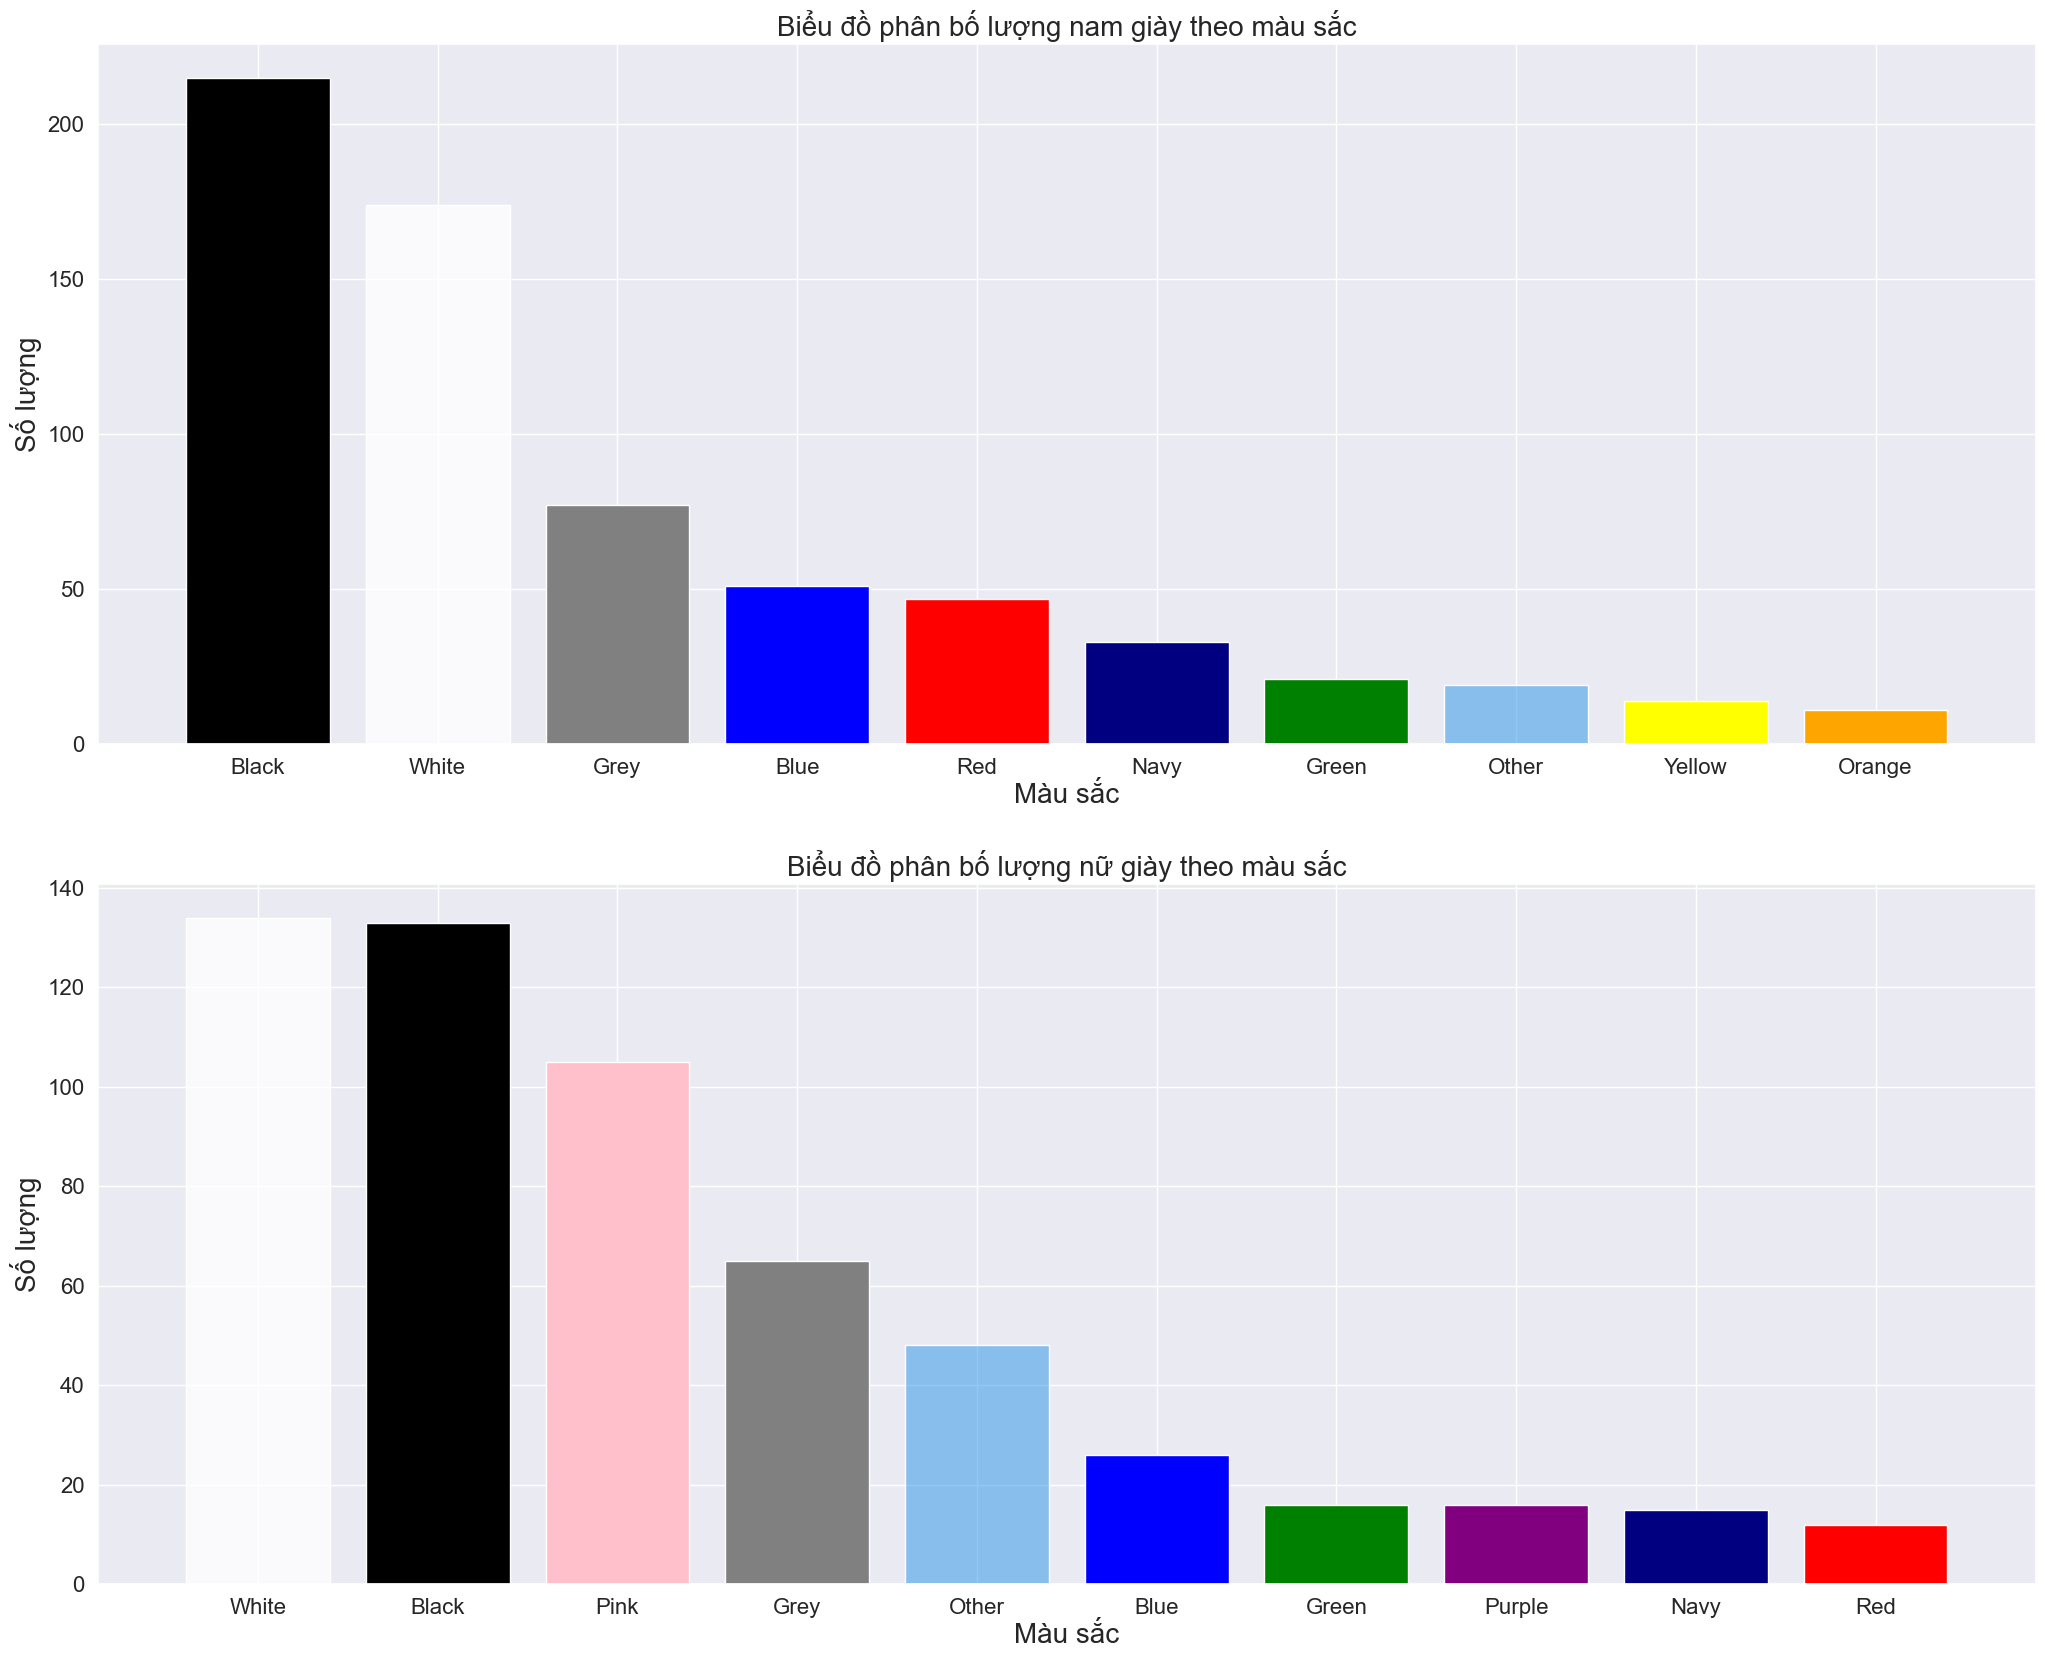

In [26]:
fig, ax = plt.subplots(2,1,figsize=(25,20))
# Vẽ biểu đồ thứ nhất
ax[0].bar(x = men_color.index, height=men_color[0],color=['black', '#ffffffcf', 'grey', 
                                                          'blue', 'red', 'navy', 'green', 
                                                          '#2793e680', 'yellow', 'orange'])



ax[0].set_title('Biểu đồ phân bố lượng nam giày theo màu sắc',fontsize=20)
ax[0].set_xlabel('Màu sắc',fontsize=20)
ax[0].set_ylabel('Số lượng',fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].grid(True)

## Vẽ biểu đồ thứ 2
ax[1].bar(x = women_color.index, height=women_color[0], color=['#ffffffcf', 'black', 'pink',
                                                               'grey', '#2793e680', 'blue',
                                                               'green', 'purple', 'navy', 'red'])


ax[1].set_title('Biểu đồ phân bố lượng nữ giày theo màu sắc',fontsize=20)
ax[1].set_xlabel('Màu sắc',fontsize=20)
ax[1].set_ylabel('Số lượng',fontsize=20)
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=16)


**Nhận xét:**
- Ở cả nam và nữ màu sắc chủ yếu của giày với số lượng chiếm nhiều hơn hết là màu đen và trắng
- Tuy nhiên ở nữ màu hồng cũng là một màu phổ biến sau trắng và đen, trong khi đó ở nam màu xám là màu phổ biến thứ 3 nhưng không quá vượt trội so với các màu còn lại.
- Ngoại trừ 3 màu phổ biến nhất ở nam và nữ, thì các màu còn lại có số lượng không nhiều và có ở cả nam và nữ như: đỏ, xanh dương, xanh lá. Và có sự khác nhau khi ở nam có màu vàng, cam trong khi ở nữ có màu tím.
> Tóm lại: Giới tính có ảnh hưởng đến màu sắc giày nhưng không nhiều.

### 4. Phân bố của kích thước giày theo giới tính

**Lựa chọn biểu đồ:** Sử dụng biểu đồ hộp giúp dễ nhận thấy phân bố của các điểm dữ liệu với tứ phân vị và các điểm ngoại lệ. Ta có thể vẽ hai biểu đồ hộp cho từng giới tính để có thể nhận thấy sự khác nhau giữa hai giới tính.

**Trực quan và nhận xét:**

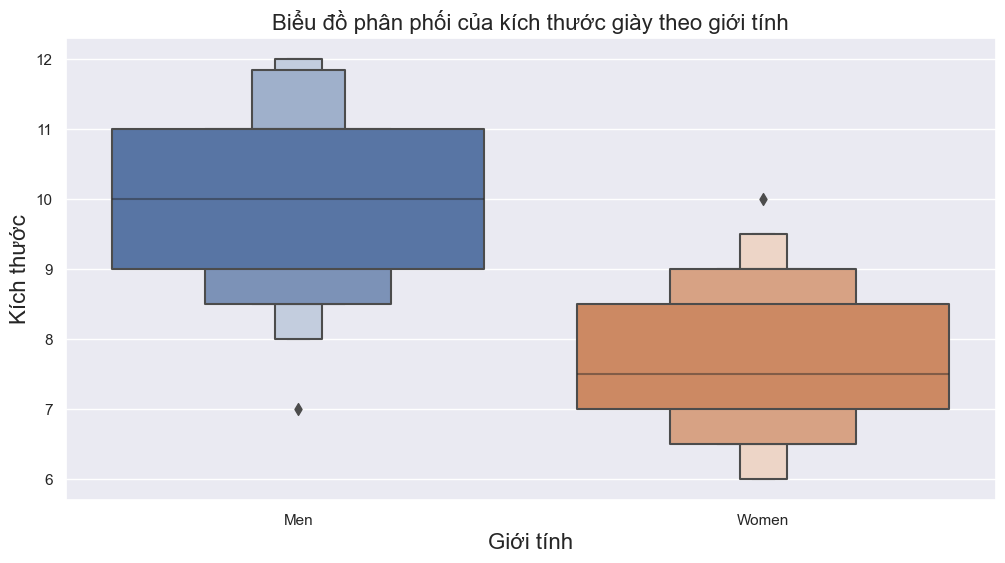

In [20]:
plt.figure(figsize=(12,6))

sns.boxenplot(x = df['Gender'], y=df['Size (US)'])
plt.title('Biểu đồ phân phối của kích thước giày theo giới tính',fontsize=16)
plt.xlabel('Giới tính',fontsize=16)
plt.ylabel('Kích thước',fontsize=16)
plt.show()


**Nhận xét:**
- Hầu hết kích thước giày của nam trong khoảng 8 đến 12, trong khi của nữ là từ 6 đến 9.5.
- Có khoảng 87,5% giày nam có kích thước trên 8.5 trong khi có khoảng 75% giày nữ lại có kích thước từ 8.5 trở xuống.
> Giới tính có ảnh hưởng đến phân phối kích thước của giày được bán.

Kiểm định giới tính có ảnh hưởng đến kích thước giày

In [21]:
men_size = df[df['Gender'] == 'Men']['Size (US)']
women_size = df[df['Gender'] == 'Women']['Size (US)']

In [22]:
men_size.var() / women_size.var()

1.3732632869099413

Ta có $ \frac{\sigma_1}{\sigma_2} < 4 $ nên có thể giả định $ \sigma_1 = \sigma_2$

$ H_0: \mu_1 = \mu_2 $ <br/>
$ H_A: \mu_1 \neq \mu_2 $

In [23]:
import scipy.stats as stats

stats.ttest_ind(a=men_size, b=women_size, equal_var=True)

Ttest_indResult(statistic=33.42829778060041, pvalue=3.5606719758297455e-161)

Với $\alpha = 0.05 $, p-value $ = 3.56 \times 10^{-161} < \alpha$<br/>
Vậy ta bác bỏ $H_0$, tức kích thước giày trung bình của nam và nữ có sự khác nhau

### 5. Tìm hiểu mức giá của các thương hiệu

**Lựa chọn biểu đồ**
- Sử dụng **biểu đồ cột** để xem giá giày trung bình của từng thương hiệu
- Sử dụng **boxplot** để khám phá phân bố về giá của các thương hiệu

In [59]:
#Tính mức giá trung bình cho mỗi thương hiệu
brand_avg_price = df.groupby('Brand')['Price (USD)'].mean()

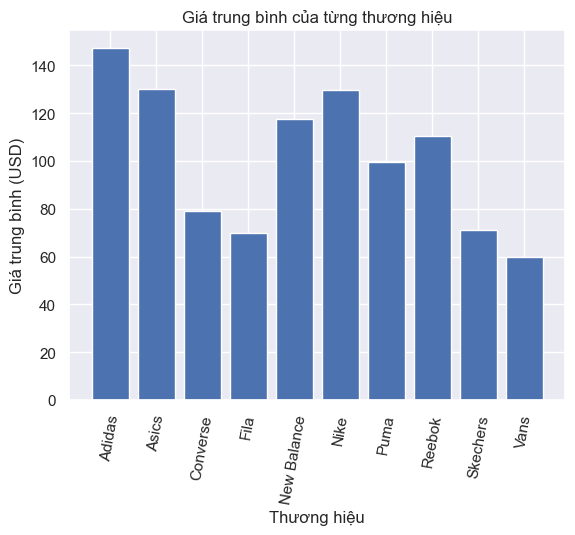

In [66]:
# Trực quan hóa biểu đồ cột cho giá trung bình của từng thương hiệu
plt.bar(brand_avg_price.index, brand_avg_price.values)
plt.xticks(rotation=80)
plt.xlabel('Thương hiệu')
plt.ylabel('Giá trung bình (USD)')
plt.title('Giá trung bình của từng thương hiệu')
plt.show()

**Nhận xét:**
- Từ biểu đồ và phân tích trên, chúng ta có thể nhận xét rằng mức giá trung bình của các thương hiệu giày trong tập dữ liệu là khá đa dạng, với khoảng cách giá trung bình giữa thấp nhất và cao nhất gần 100
- Giá của một đôi giày phụ thuộc vào nhiều yếu tố, như thương hiệu, mẫu mã, chất liệu, kích cỡ, màu sắc và loại giày.
- các thương hiệu có mức giá trung bình cao hơn thường là các thương hiệu cao cấp, có tiếng tăm trong ngành ( Adidas, Nike)

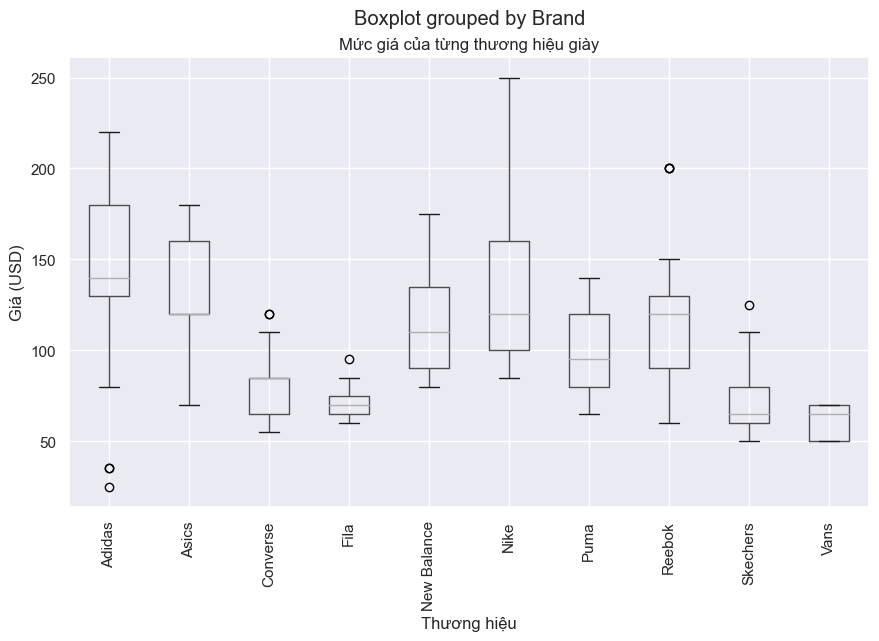

In [61]:
df.boxplot(column='Price (USD)', by='Brand', figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('Thương hiệu')
plt.ylabel('Giá (USD)')
plt.title('Mức giá của từng thương hiệu giày')
plt.show()

**Nhận xét:** 
- Giày có giá cao nhất(250) được sản xuất bởi Nike, giày có giá thấp nhất được sản xuất bởi Adidas(25)
- Có sự khác biệt lớn giữa mức giá giày của các thương hiệu, với khoảng cách giữa giá thấp nhất và giá cao nhất của mỗi thương hiệu đều khá lớn, dao động trong khoảng từ 50 đến 150
- Tuy nhiên, các thương hiệu như Nike, Adidas và Puma có mức giá trung bình cao hơn so với các thương hiệu khác trong tập dữ liệu.

### 6. Loại giày nào là phổ biến nhất trong tập dữ liệu này? Sự phân bố về giá cả của giày theo loại giày?


**Lựa chọn biểu đồ**
- Sử dụng **countplot** để thấy được số lượng các loại giày của từng loại giày
- Sử dụng **histplot** để thể hiện phân bố tần suất giá của giày theo loại giày

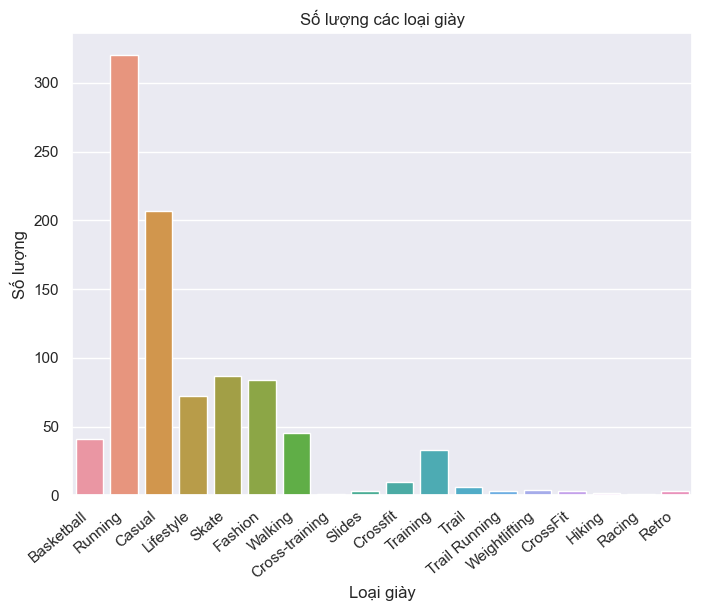

In [73]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Số lượng các loại giày')
plt.xlabel('Loại giày')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**
- Ta có thể thấy rằng Running là loại giày phổ biến nhất trong tập dữ liệu này, theo sau là Casual, và giày Cross-training và Racing là loại giày ít xuất hiện nhất.
- Các loại giày có số lượng không đồng đều và có sự chênh lệch rất lớn.

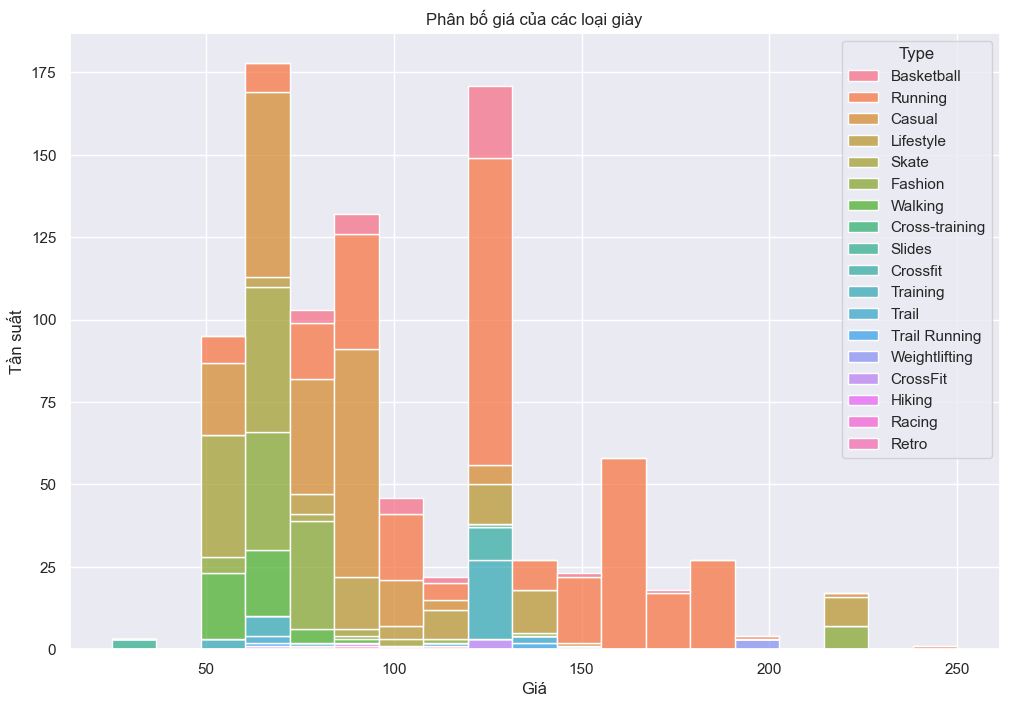

In [76]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=df, x='Price (USD)', hue='Type', multiple='stack')
plt.title('Phân bố giá của các loại giày')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.show()

**Nhận xét:**
- Giá cả của các loại giày trải dài từ 25 đến 250.
- Tuy nhiên sự phân bố này không đồng đều ở các loại giày
- Giá của giày Running thường ở phân khúc cao (>100), ngược lại là giá của giày Walking thường ở phân khúc thấp (<100)


### 7. Chất liệu nào được sử dụng phổ biến nhất trong các loại giày này? Liệu có sự khác biệt về giá cả giữa các chất liệu không?


**Lựa chọn biểu đồ**
- Sử dụng biểu đồ **countplot** để thấy được sự phân bố về số lượng theo chất liệu sử dụng.
- Sử dụng biểu đồ **boxplot** để thấy được phân bố về giá của từng chất liệu.

**Trực quan**

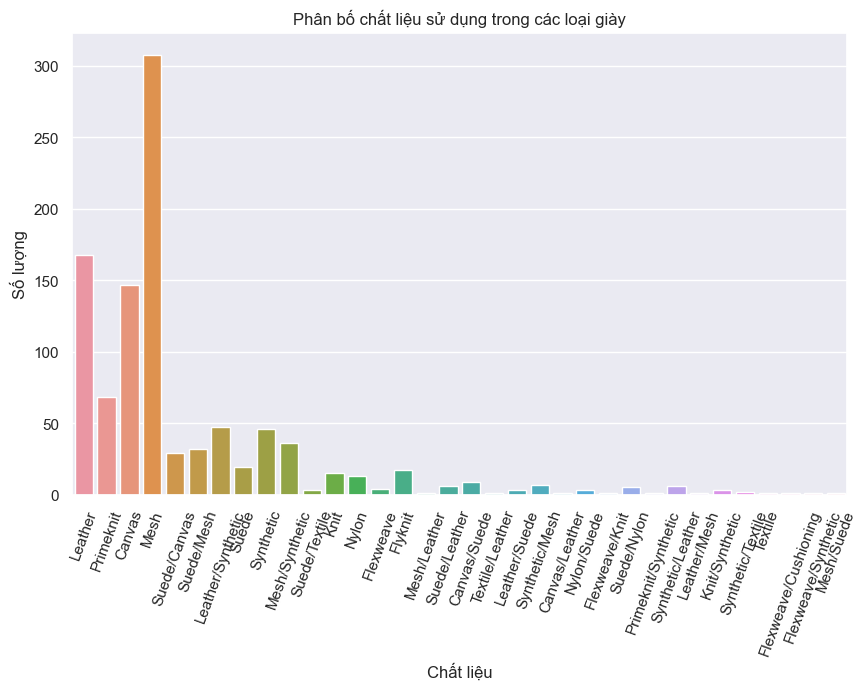

In [91]:
# Vẽ biểu đồ sử dụng countplot
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x="Material", data=data)
plt.title("Phân bố về số lượng theo chất liệu")
plt.xlabel("Chất liệu")
plt.ylabel("Số lượng")
plt.xticks(rotation=70)
plt.show()

**Nhận xét:** 
- Chất liệu được sử dụng phổ biến nhất là Mesh, tiếp sau đó là Leather và Canvas.
- Có sự chênh lệch lớn giữa về việc được sử dụng giữa các chất liệu.

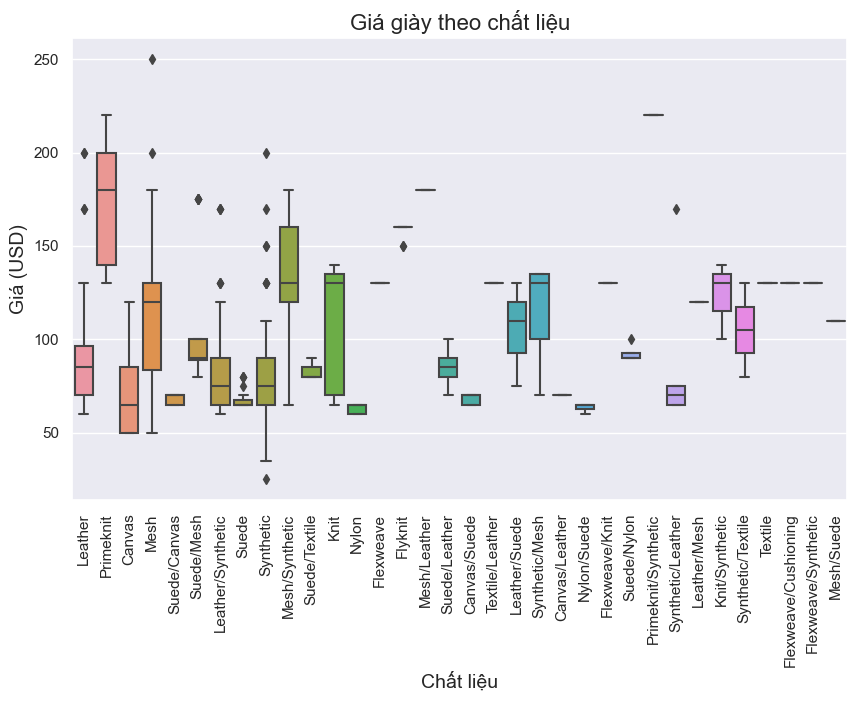

In [100]:
# Tạo boxplot cho giá theo chất liệu
plt.figure(figsize=(10,6))
sns.boxplot(x="Material", y="Price (USD)", data=df)
plt.title("Giá giày theo chất liệu", fontsize=16)
plt.xlabel("Chất liệu", fontsize=14)
plt.ylabel("Giá (USD)", fontsize=14)
plt.xticks(rotation=90)
plt.show()


**Nhận xét**
- Giá của từng chất liệu đều có sự phân bố rộng ( 50-250)
- Giày có giá cao nhất (250) sử dụng chất liệu Mesh, Giày có giá thấp nhất sử dụng chất liệu Synthetic
- Không có sự chênh lệch rõ ràng về sự phân bố giá theo các chất liệu

### 8. Tìm hiểu mối tương quan giữa Price(USD) và Size(USD)


**Lựa chọn biểu đồ:** 
- Sử dụng biểu đồ heatmap để thấy được mức độ tương quan giữa 2 biến, từ đó rút ra nhận xét. 

**Trực quan** 


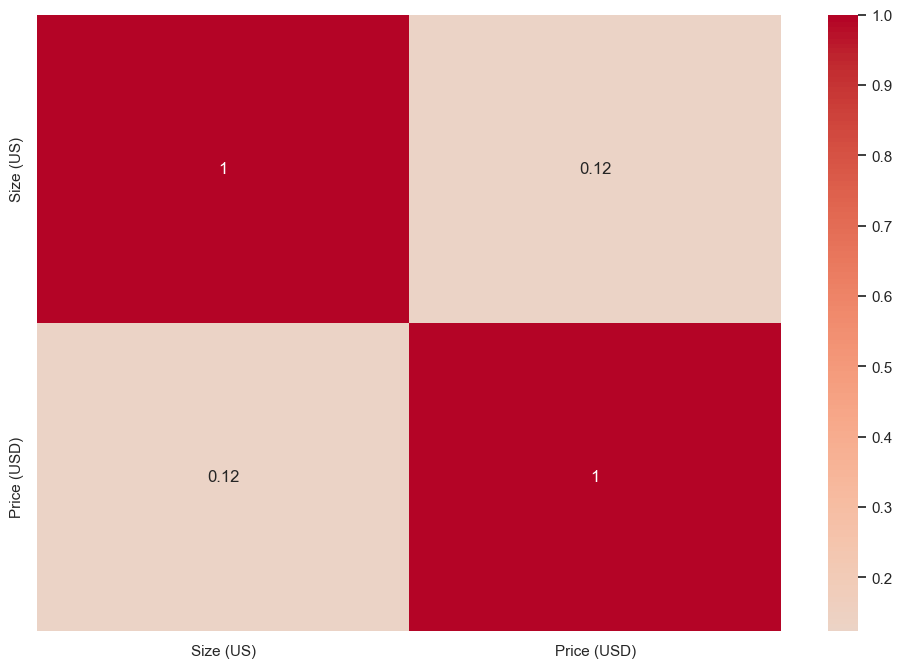

In [103]:
# Lấy ra các cột dữ liệu cần tính toán ma trận tương quan
data_corr = df[['Size (US)','Price (USD)']]

# Tính ma trận tương quan
corr = data_corr.corr()

# Vẽ biểu đồ heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

**Nhận xét**: 
- Giá trị tương quan là 0.12 cho thấy mối tương quan giữa Price và Size không mạnh mẽ. 
- Có thể hiểu rằng việc tăng hoặc giảm kích cỡ giày không có tác động lớn đến giá của giày, và ngược lại, giá của giày cũng không ảnh hưởng đáng kể đến kích cỡ giày.